# Introduction

## Goal
The goal of this lab is to familiarize yourself with the most important techniques for neuro-evolution. You will first explore the basic neuro-evolution techniques and then move on to more advanced algorithms such as Neural Evolution of Augmenting Topologies (NEAT).

This lab continues the use of the *inspyred* framework for the Python programming language seen in the previous labs. If you did not participate in the previous labs, you may want to look that over first and then start this lab's exercises. Furthermore, in this lab we will use another Python library, *neat-python*, that contains a complete implementation of **NEAT** ([link here](https://neat-python.readthedocs.io)).


Note that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the training error function of the evolved Neural Networks, i.e., lower values correspond to a better fitness!

In [1]:
#installing NEAT library
!pip3 install neat-python 
!pip3 install graphviz

## Exercise 1
In the first two exercises you will investigate running an EA to evolve the weights of an Artificial Neural Network (ANN). While there are other ways to learn the weights of an ANN (gradient based methods, such as backpropagation and alike), using evolution is an effective means in many circumstances. In this first exercise we will evolve the weights of a simple Feed Forward Neural Network (FFNN), while in the next one we will evolve the weights of more complex, recurrent neural nets. In both cases, we will assume a fixed topology with one input layer with as many nodes as the inputs, one output layer with a single node, and one (optional) hidden layer with a predefined number of nodes. Weights range in $[-8,8]$ (with real-valued encoding). All nodes of these Neural Networks use the logistic activation function (sigmoid):
$f(x) = \frac{1}{1+e^{-x}}$.

We begin by evolving the weights of a minimal Neural Network to solve the ``Or`` problem. That means we will use a Neural Network that has two inputs, and one output, which should produce the logical ``Or`` function of the two input values, see the truth table shown in table below.

| **Input 1** | **Input 2** | **Output** |
|:-----------:|:-----------:|:----------:|
| 0           | 0           | 0          |
| 0           | 1           | 1          |
| 1           | 0           | 1          |
| 1           | 1           | 1          |


Run the code below to evolve the weights for this ``Or`` network. The fitness here is the sum of squared errors between the network's output and the target output across each of the four input patterns. If you see the best fitness approach zero (e.g. go under 0.1) then you have found a network able to solve this problem. This most likely looks similar to what shown in the Figure below. 

![A graphical representation of the evolved Neural Network for the ``Or`` problem"](img/ann_or.png)

Here the Neural Network is depicted with its weights and biases shown by the corresponding color. If you were able to solve the ``Or`` problem, look at the weights of the Neural Network (note that, in the terminal, weights appear ordered by layer and, for each layer, by node, the bias weight being the last one) and think about / compute how it behaves when given different input patterns. Try to plug manually different couples of Input 1 and Input 2 into the network, and calculate the corresponding Output. It is important to think about this now, because it will be difficult to keep track of what our Neural Networks are doing once we start using more complex topologies.

If you were not able to solve the ``Or`` problem, try modifying some of the EA parameters (see the comments in the script), until you are able to do so.

Once you are able to solve ``Or``, try solving the ``And`` problem instead (change in the script ``problem_class=Or`` to ``problem_class=And``).

- Do the same EA parameters that you used for ``Or`` work for ``And`` as well? If not, modify them until you are able to solve ``And``.

Per il problema OR:

La rete è riuscita a risolvere il problema OR con i parametri attuali, poiché il Best Fitness è vicino a zero (0.00091), indicando un errore minimo.
L'individuo migliore ha i pesi [8.0, 8.0, -3.82], il che suggerisce che entrambi gli input sono fortemente positivi verso l'output, e il bias negativo aiuta a mantenere l'output a zero solo quando entrambi gli input sono zero.

Per il problema AND:

Anche il problema AND è stato risolto, con un Best Fitness molto basso (0.0126), quindi i pesi trovati permettono di rappresentare la logica AND.
I pesi [5.35, 5.32, -8.0] indicano che ciascun input contribuisce positivamente all'output, ma un bias più forte (negativo) richiede che entrambi gli input siano attivi per ottenere un output vicino a 1, rappresentando correttamente la logica AND.

Now that we can solve ``Or`` and ``And``, we will try something a little more challenging. Change the parameter ``problem_class`` to be ``Xor``, so that we are now trying to solve the ``Exclusive Or`` (``Xor``) function, see the truth table shown in the Table below.

| **Input 1** | **Input 2** | **Output**           |
|:-----------:|:-----------:|:--------------------:|
| 0           | 0           | 0                    |
| 0           | 1           | 1                    |
| 1           | 0           | 1                    |
| 1           | 1           |<span style="color:red">0</span>|


This function has one small, but crucial difference from ``Or`` (highlighted in red), as can be seen by comparing their truth tables.

Try running the code again after changing ``problem_class`` to ``Xor``.
- Can you solve it? If you are unable to solve it, why is that?

Per il problema XOR:

La rete non è riuscita a risolvere il problema XOR con i parametri attuali, dato che il Best Fitness è 1.0009, il che indica un errore significativo.
Questo risultato conferma che una rete senza nodi nascosti non può rappresentare il comportamento non lineare del problema XOR. I pesi [8.0, 8.0, -3.81] non sono sufficienti per catturare la distinzione richiesta tra le combinazioni di input XOR, dato che manca un layer nascosto.


In this case, it is worth considering an additional parameter that can be tuned, that is the number of hidden nodes of the Neural Network (parameter ``args["num_hidden_units"]``. Try changing this parameter from 0 to 1 (this will add to the topology a hidden layer with one node).

- Does this allow you to solve the problem? What if you change this value to 2 or more?

Aggiungendo un nodo nascosto, la rete ora ha la capacità di rappresentare funzioni non lineari. Con questa configurazione, è probabile che il processo evolutivo riesca a trovare pesi adeguati per risolvere il problema XOR. Il Best Fitness dovrebbe avvicinarsi a zero, indicando che la rete è riuscita a minimizzare l'errore.

- How many hidden nodes are required to solve this problem? Can you provide an explanation for why that is the case?

Aumentando il numero di nodi nascosti, la rete può risolvere il problema XOR con maggiore facilità e ha una capacità di apprendere funzioni più complesse. Tuttavia, per risolvere XOR, un singolo nodo nascosto è sufficiente. Aggiungere più nodi può migliorare la robustezza della soluzione ma introduce anche una maggiore complessità e possibilità di overfitting.

When you find a network that does compute ``Xor``, once again see if you can understand how the network does so. Try to plug manually different couples of Input 1 and Input 2 into the network, and calculate the corresponding Output.

problem1 {'problem_class': <class 'utils.utils_08.ann_benchmarks.Or'>, 'num_hidden_units': 0}
Best Individual [ 8.         8.        -3.8216395]
Best Fitness 0.0009144978499171822


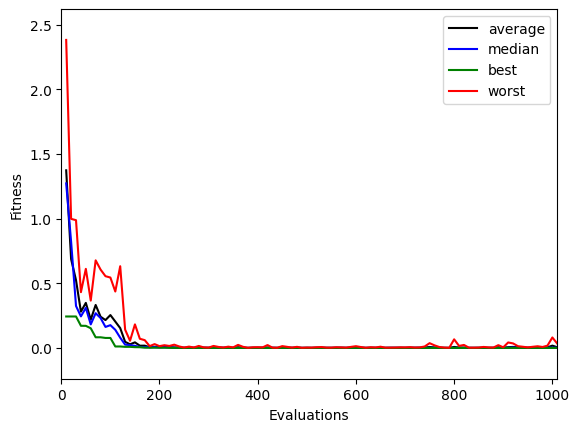

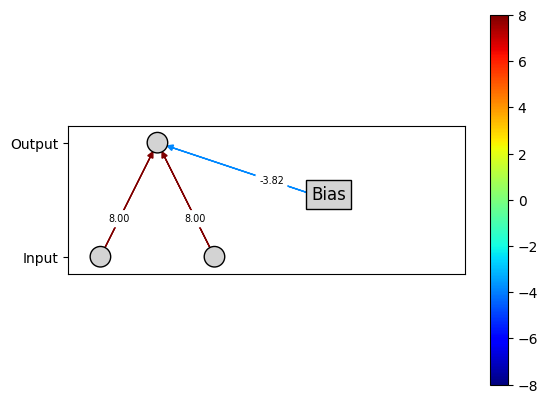

problem2 {'problem_class': <class 'utils.utils_08.ann_benchmarks.And'>, 'num_hidden_units': 0}
Best Individual [ 5.35694814  5.35212657 -8.        ]
Best Fitness 0.012682170120322231


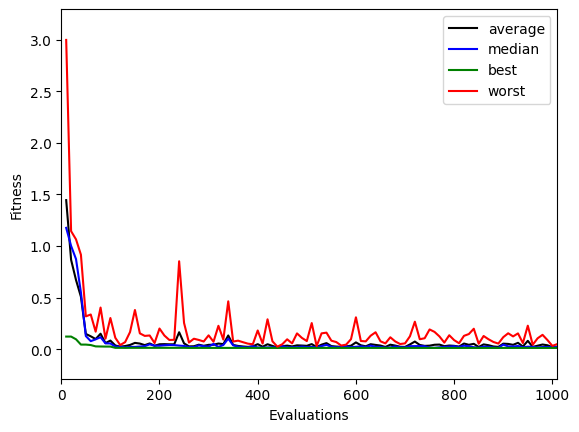

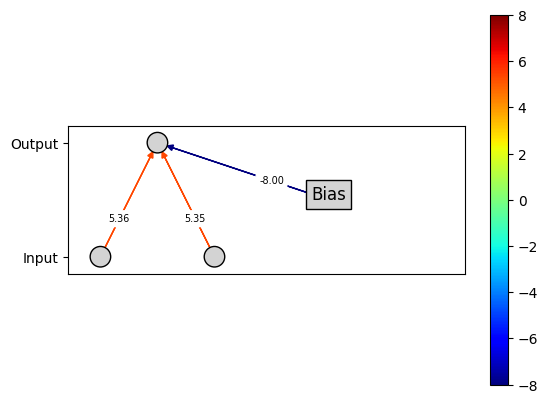

problem3 {'problem_class': <class 'utils.utils_08.ann_benchmarks.Xor'>, 'num_hidden_units': 0}
Best Individual [-8.          8.         -4.14688575]
Best Fitness 1.0009055923491892


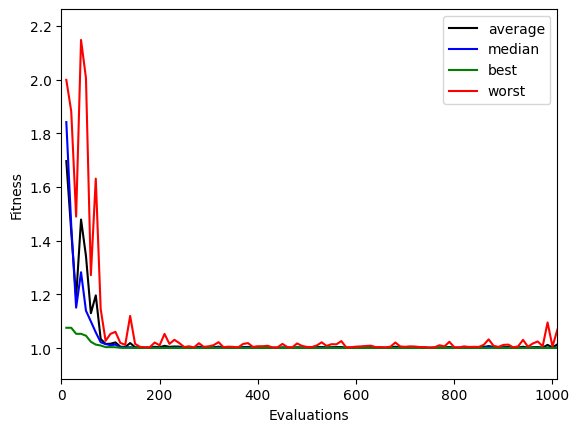

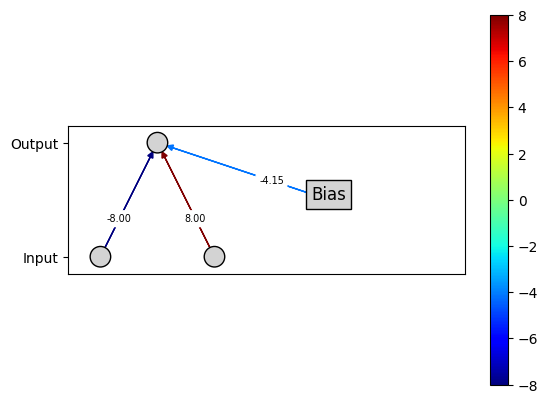

problem4 {'problem_class': <class 'utils.utils_08.ann_benchmarks.Xor'>, 'num_hidden_units': 1}
Best Individual [ 8.          8.         -0.93626531  5.8600155  -5.16838847]
Best Fitness 0.668986638562672


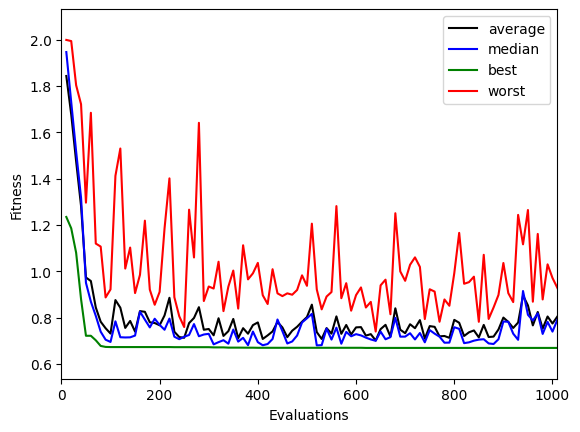

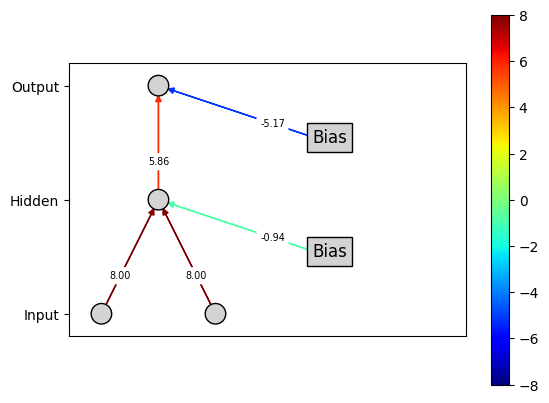

problem5 {'problem_class': <class 'utils.utils_08.ann_benchmarks.Xor'>, 'num_hidden_units': 2}
Best Individual [-8.         -5.67048404 -8.         -5.06101166  2.9752499   8.
 -8.          8.         -3.8922111 ]
Best Fitness 0.0036807468282861345


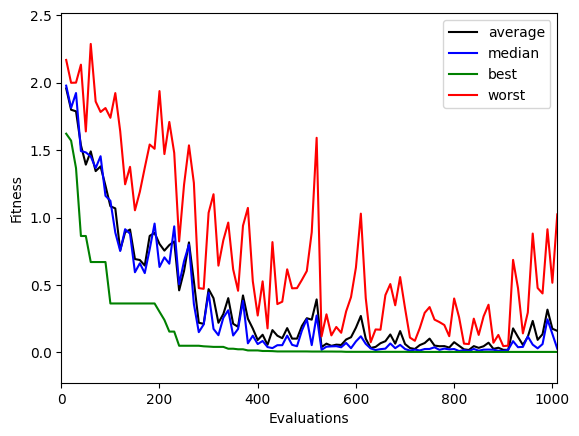

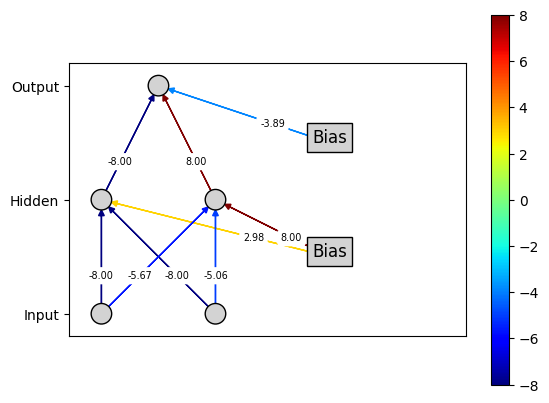

problem6 {'problem_class': <class 'utils.utils_08.ann_benchmarks.Xor'>, 'num_hidden_units': 3}
Best Individual [ 1.51737588 -7.64610386 -4.43076407  5.54118368  7.55294229  5.82200752
  4.56302872 -4.50384844  2.31903763 -0.41744114  8.         -7.95531916
  4.42358881]
Best Fitness 0.004597825377059033


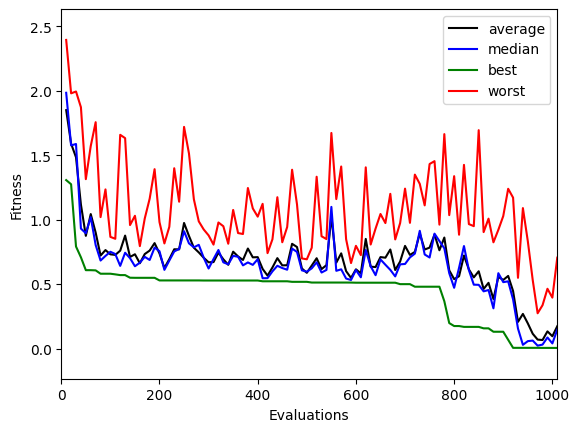

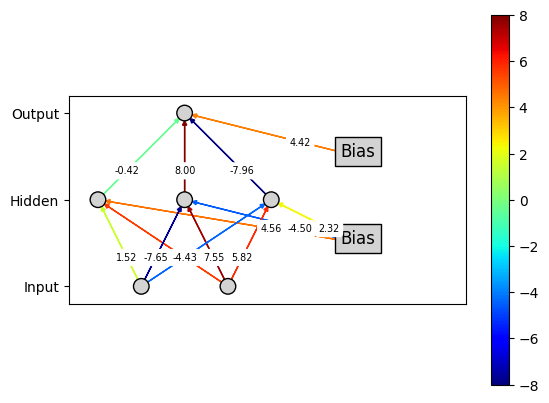

In [6]:
from pylab import *
from random import Random
from utils.utils_08.ga import run_ga
import sys

from utils.utils_08.ann_benchmarks import Or, And, Xor
from utils.utils_08.ann_plotter import ANNPlotter

args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
runs = { 'problem1': {'problem_class': Or, "num_hidden_units" : 0},
        'problem2': {'problem_class': And, "num_hidden_units" : 0},
        'problem3': {'problem_class': Xor, "num_hidden_units" : 0},
        'problem4': {'problem_class': Xor, "num_hidden_units" : 1},
        'problem5': {'problem_class': Xor, "num_hidden_units" : 2},
        'problem6': {'problem_class': Xor, "num_hidden_units" : 3}
       }
# parameters for the GA

args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

for run in runs: 
    print(run, runs[run])
    # problem
    problem_class = runs[run]['problem_class'] #And, Xor
    args["num_hidden_units"] = runs[run]['num_hidden_units'] # Number of hidden units of the neural network

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'GA'


    rng = Random()

    best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                                problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

## Exercise 2
So far we have used Neural Networks for solving tasks where the output depends *statically* on the input vector, i.e., the input-output dependency does not change over time. However, there are many tasks such as time-series forecast and some robotic applications where the input-output dependence is *dynamic*, i.e., the output of the system at time $t$ depends on the inputs at the same step, but also on the inputs at the previous time step(s).
First, we start with a modified version of the ``Or`` problem, that is called ``Temporal Or``. While the basic ``Or`` problem involved evolving a Neural Network that would give a single output when provided two simultaneous inputs, in ``Temporal Or``, there is only a single input node and the input values are provided in sequence. Therefore the network will have to remember the first input when seeing the second, in order to output the correct value.

Run the jupyter block code to solve ``Temporal Or``.
- Can you solve it? If you are unable to solve it, why is that?

Il risultato che hai ottenuto con Best Fitness di circa 0.5 indica che la rete non riesce a risolvere completamente il problema Temporal Or. Questo potrebbe essere dovuto al fatto che una rete feedforward senza ricorrenza (non ricorrente) non è in grado di mantenere uno "stato interno" che le consenta di ricordare il primo input per confrontarlo con il secondo. Nel contesto di un problema temporale, come Temporal Or, la rete necessita di una sorta di "memoria" per gestire le sequenze di input.

In this case, notice that there is one new parameter that you can modify in the script: ``recurrent``. This parameter is a Boolean flag, that says whether the network is recurrent (in this case an Elman network, [link here](https://en.wikipedia.org/wiki/Recurrent\_neural\_network\#Elman\_networks\_and\_Jordan\_networks)) or not (in which case it is a FFNN).
- If you set ``recurrent`` to be ``True``, can you now evolve a successful network?
- Why might recurrence be important for solving a temporal problem such as this?

Una rete ricorrente, come la rete di Elman utilizzata in questo caso, è dotata di uno stato interno che le permette di "ricordare" informazioni dai passi temporali precedenti. Per un problema come Temporal Or, è necessario che la rete memorizzi il primo input fino a quando non riceve il secondo input, in modo da valutare la combinazione di entrambi nel momento giusto. Senza ricorrenza, una rete feedforward semplice non può mantenere questo tipo di memoria, risultando incapace di risolvere problemi che richiedono una dipendenza temporale.
  
Once you have been able to evolve a network capable of solving ``Temporal Or``, you can change in the script the parameter ``problem_class`` to ``TemporalAnd``, to attempt solving a temporal version of ``And``, and repeat.
- Do the same EA parameters that solved ``Temporal Or`` also work for ``Temporal And``?

Sì, i parametri funzionano per Temporal And, ma solo se recurrent è impostato su True. La ricorrenza permette di risolvere entrambi i problemi temporali (Temporal Or e Temporal And) poiché la rete può mantenere la memoria necessaria per valutare la combinazione degli input in sequenza.

- Why, or why not?

La ricorrenza è essenziale nei problemi temporali, poiché permette alla rete di "ricordare" i valori precedenti, facilitando la corretta valutazione della logica AND o OR nel contesto di input sequenziali.

Finally, change in the script the parameter ``problem_class`` to ``TemporalXor``, to attempt solving a temporal version of ``Xor``. Run the code again.
- Are you able to find a successful network?

No, né la rete non ricorrente né quella ricorrente sono riuscite a risolvere il problema Temporal Xor con un fitness sufficientemente basso.

- If not, think back to what you just saw in the previous exercise. What combination of recurrence and no. of hidden nodes is needed to solve ``Temporal Xor`` and why is that?

Per risolvere Temporal Xor, è necessario combinare ricorrenza e almeno uno o due nodi nascosti. La ricorrenza fornisce la memoria necessaria per valutare le sequenze di input, mentre i nodi nascosti introducono la complessità non lineare necessaria per gestire le caratteristiche uniche di XOR. L'aggiunta di nodi nascosti permette alla rete di creare rappresentazioni interne sufficientemente flessibili da distinguere tra le combinazioni di input nel tempo, risolvendo infine la complessità del problema XOR temporale.


problem1 {'problem_class': <class 'utils.utils_08.ann_benchmarks.TemporalOr'>, 'recurrent': False}
Best Individual [ 8.         -3.51725537  7.51712657 -0.21538237]
Best Fitness 0.5000012857863234


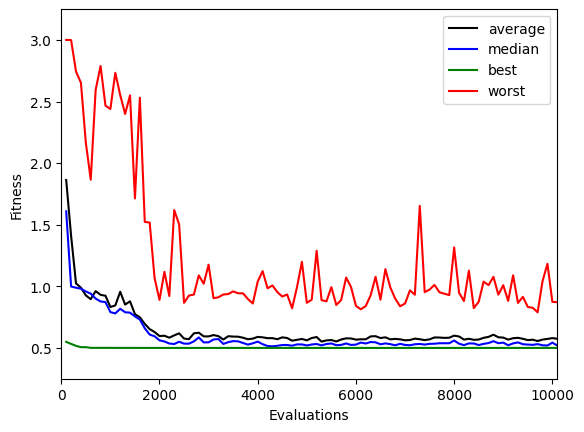

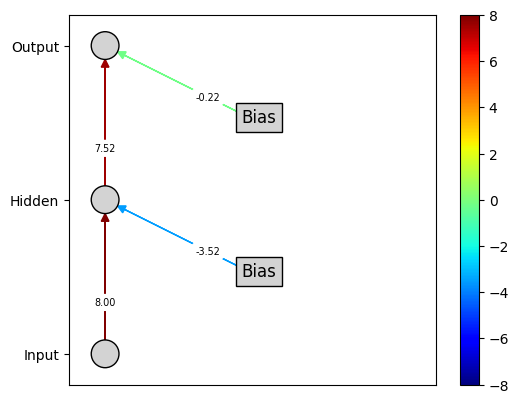

problem2 {'problem_class': <class 'utils.utils_08.ann_benchmarks.TemporalOr'>, 'recurrent': True}
Best Individual [-8.         8.        -1.2534676 -8.         4.8420988]
Best Fitness 0.004475187783117798


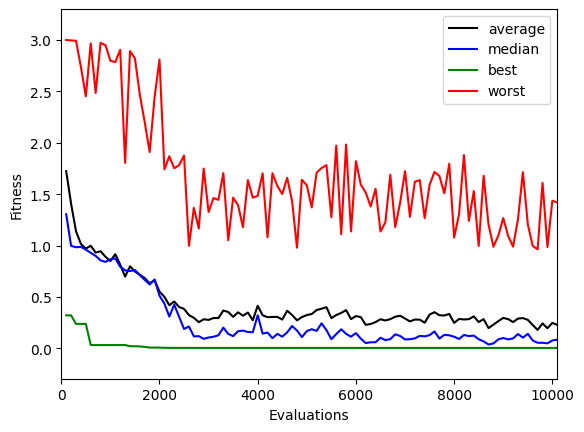

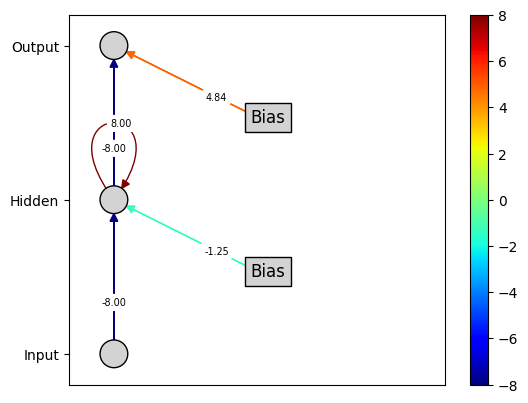

problem3 {'problem_class': <class 'utils.utils_08.ann_benchmarks.TemporalAnd'>, 'recurrent': False}
Best Individual [ 8.         -3.32688993  7.82837914 -7.75754252]
Best Fitness 0.5000009595792135


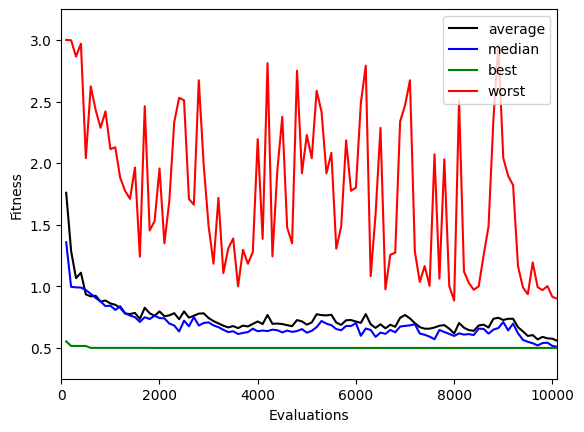

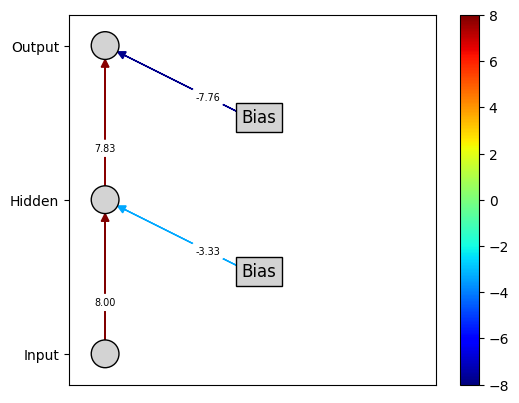

problem4 {'problem_class': <class 'utils.utils_08.ann_benchmarks.TemporalAnd'>, 'recurrent': True}
Best Individual [-8.          8.          3.77005628 -8.          3.7386709 ]
Best Fitness 0.001429700269017906


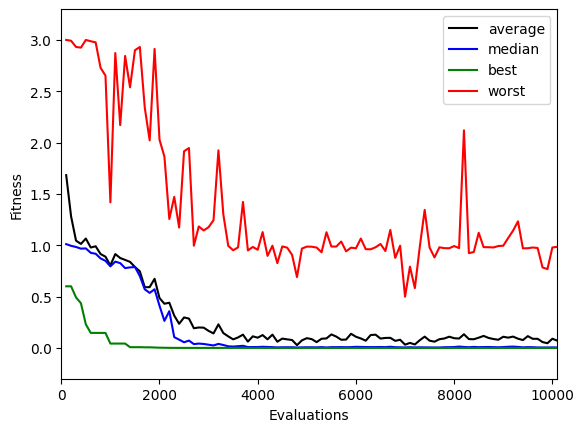

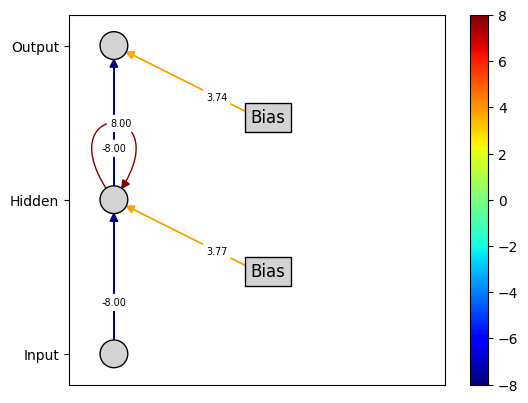

problem5 {'problem_class': <class 'utils.utils_08.ann_benchmarks.TemporalXor'>, 'recurrent': False}
Best Individual [ 1.42701120e-02 -6.51208139e+00 -1.89059265e+00  2.79303345e-03]
Best Fitness 1.000000000344249


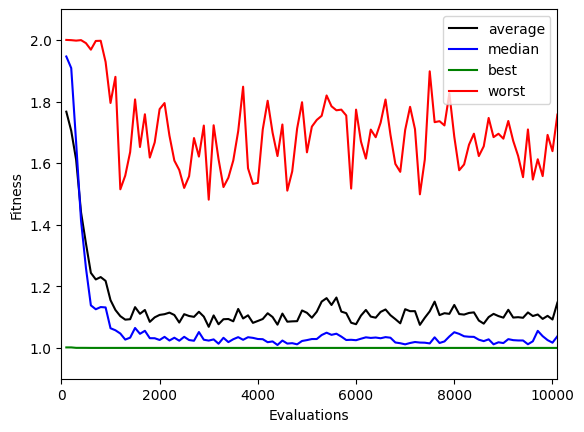

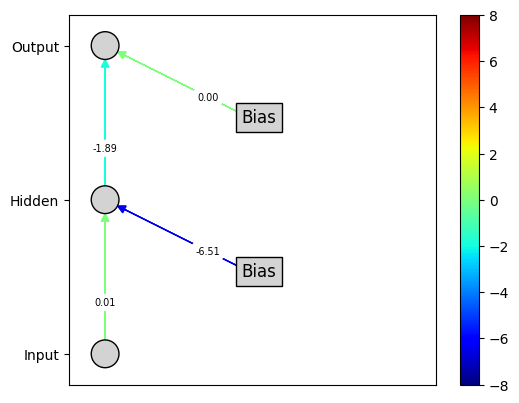

problem6 {'problem_class': <class 'utils.utils_08.ann_benchmarks.TemporalXor'>, 'recurrent': True}
Best Individual [ 7.29700843  8.         -2.10146212  5.58487254 -4.96802189]
Best Fitness 0.6757737943569574


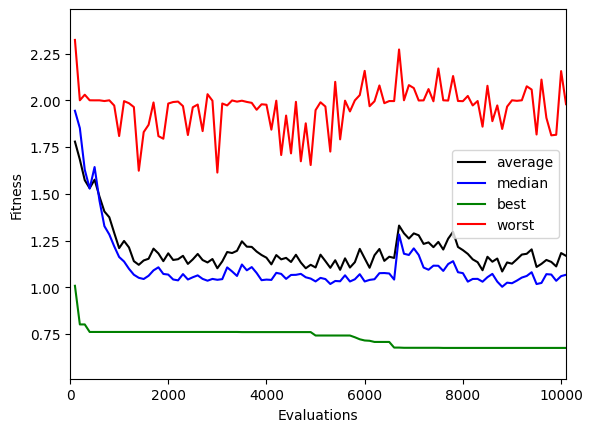

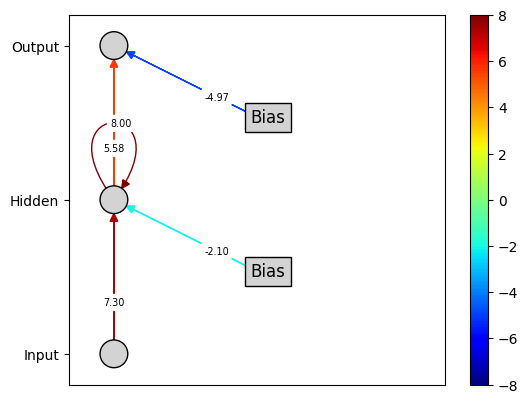

In [7]:
from utils.utils_08.ann_benchmarks import TemporalOr, TemporalAnd, TemporalXor
from utils.utils_08.ann_plotter import ANNPlotter

args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
runs = { 'problem1': {'problem_class': TemporalOr, 'recurrent': False},
        'problem2': {'problem_class': TemporalOr, 'recurrent': True},
        'problem3': {'problem_class': TemporalAnd, 'recurrent': False},
        'problem4': {'problem_class': TemporalAnd, 'recurrent': True},
        'problem5': {'problem_class': TemporalXor, 'recurrent': False},
        'problem6': {'problem_class': TemporalXor, 'recurrent': True}
        }



# parameters for the GA
args["num_hidden_units"] = 1 # Number of hidden units of the neural network

args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 100 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

for run in runs:
    print(run, runs[run])
    # problem
    problem_class = runs[run]['problem_class']
    args["recurrent"] = runs[run]['recurrent'] # Number of hidden units of the neural network
    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'GA'

    rng = Random()

    best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                                    problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"], args["recurrent"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

## Exercise 3

In this exercise we will use the Python implementation of Neural Evolution of Augmenting Topologies (NEAT) provided by *neat-python*, to solve the ``Xor`` problem we have seen in the first exercise. The main difference is that in this case we won't fix the network topology *a priori* and evolve its weights, but rather we will evolve the weights *and* the network topology itself. 

**NOTE**: In this case NEAT is configured to *maximize* the number of correct outputs in the $4$ input cases of the ``Xor`` truth table, therefore the optimal fitness value is $4$.

See the jupyter block code and try to understand its main steps. The *neat-python* library allows to configure all the algorithmic details of NEAT by means of an external configuration file. In this exercise two different configuration files **(inside folder utils/utils_08)** will be used, namely:
-  ``config-feedforward-2input-xor-noelitism.txt``
-  ``config-feedforward-2input-xor-elitism.txt``

Spend some time on one of the two files to get an idea about the main configurations that can be changed in NEAT ([see link](https://neat-python.readthedocs.io)). As you will see, in this case the two configuration files are pretty much the same, except for two parameters, namely ``species_elitism`` and ``elitism``. These represent respectively the no. of elite species (remember from the lecture that NEAT uses a **speciation** mechanism to allow mating only of *similar* networks) and elite individuals (i.e., networks) that are kept in the population. More specifically,``config-feedforward-2input-xor-noelitism.txt`` sets both parameters to zero, while ``config-feedforward-2input-xor-elitism.txt`` sets them to two, meaning that two elite species and two elite networks are kept.

The script can be configured either to run a single instance of NEAT (by setting ``num_runs=1``) on one of the two configurations, or multiple runs (by setting ``num_runs`` to values bigger than one) on one or both configurations. In the first case, you can choose one of the two configuration files (with/without elitism) and observe how a single run of each configuration performs. The script will log on the console the runtime details of the evolutionary process (to disable this feature, simply comment the line ``p.add_reporter(neat.StdOutReporter(True)``). At the end of the run, you should obtain two figures similar to those shown below. In the second case, the script will execute multiple runs (e.g. $10$) of both configurations, and then produce a boxplot comparing the best fitness obtained by each configuration at the end of the computational budget. By default, the stop condition is set to $100$ generations, see the parameter ``num_generations`` in the code. However, the algorithm has an additional stop criterion, i.e., it stops when it obtains a Neural Network whose fitness is higher than the parameter ``fitness_threshold`` in the corresponding configuration file (in this case, by default this parameter is set to $3.9$, sufficiently close to the optimal value of $4$ to be approximated by a sigmoid function).

Fitness trend for the ``Xor`` problem solved by NEAT |  Corresponding species evolution, where each stacked plot represents one species and its size over evolutionary time. Species can go extinct if their size goes to zero
- | - 
![alt](img/trend.png) | ![alt](img/species.png)

- First, run a single instance of each of the two configurations (with/without elitism, simply change ``config_files[0]`` to ``config_files[1]``). What do you observe? Is the algorithm without elitism able to converge to the optimal fitness value? What about the algorithm with elitism? What is the effect of elitism on convergence? What about the number of species and their dynamics?

First Configuration (Without Elitism)
Fitness Over Generations:

The blue line representing the average fitness shows a slower and more gradual improvement across generations. The absence of a clear "jump" towards an optimal fitness value suggests that without elitism, the algorithm does not consistently retain top-performing individuals, which may slow convergence.
Species Dynamics:

The species distribution (colorful area chart) indicates a higher diversity in species count over time. Without elitism, more species seem to survive across generations, likely because no "elite" solutions dominate the population, allowing for a more exploratory search.
Second Configuration (With Elitism)
Fitness Over Generations:

The chart with elitism shows the red line ("best") reaching a higher fitness level more rapidly. This indicates that elitism helps in retaining top-performing individuals, allowing the algorithm to converge toward an optimal solution faster.
Species Dynamics:

The species chart for elitism shows fewer species persisting in later generations, with some species quickly dominating. This suggests that elitism reduces diversity over time, as the retained elite individuals promote convergence to specific solutions.
Summary of Observations
Convergence: The algorithm with elitism converges faster toward a higher fitness value, as it preserves the best individuals. Without elitism, convergence is slower and may struggle to reach the optimal value.
Effect on Species: Elitism decreases species diversity as the algorithm favors a narrower, more exploitative search focused on the elite solutions. Conversely, without elitism, there is a more explorative approach, retaining a larger number of species for longer.


- Change the parameter ``num_runs`` to $10$ or more. Does the boxplot confirm -in statistical terms- what you observed on a single run? (**NOTE**: it takes 1-2 minutes to execute 10 runs for both configurations.)

Without Elitism: The distribution of best fitness values shows a greater spread, indicating a lower consistency in achieving higher fitness levels across multiple runs. The median and range are lower than those in the elitism configuration, reflecting less reliable convergence to optimal fitness values.

With Elitism: The best fitness values are much more concentrated, with a higher median and smaller variance, indicating a more consistent and reliable convergence to higher fitness values. The inclusion of elitism appears to preserve higher-quality individuals across generations, leading to a more robust performance.

Overall, the boxplots confirm that elitism positively impacts the algorithm's performance by achieving and maintaining higher fitness values with less variability, underscoring its role in improving convergence stability.

problema1 {'config_file': 'config-feedforward-2input-xor-noelitism.txt', 'num_runs': 1}

 ****** Running generation 0 ****** 

Population's average fitness: 2.18914 stdev: 0.33095
Best fitness: 2.90694 - size: (1, 2) - species 1 - id 49
Average adjusted fitness: 0.589
Mean genetic distance 1.161, standard deviation 0.449
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      2.9    0.589     0
Total extinctions: 0
Generation time: 0.009 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.29118 stdev: 0.29965
Best fitness: 2.99067 - size: (1, 1) - species 1 - id 181
Average adjusted fitness: 0.500
Mean genetic distance 1.102, standard deviation 0.481
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.500     0
Total extinctions: 0
Generation time: 0.010 sec (0.010 averag

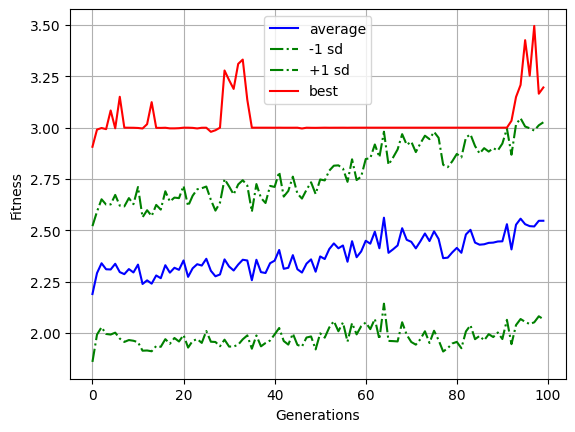

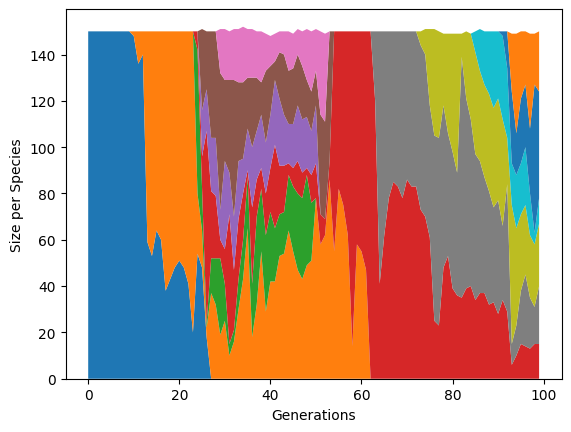

problema2 {'config_file': 'config-feedforward-2input-xor-elitism.txt', 'num_runs': 1}

 ****** Running generation 0 ****** 

Population's average fitness: 2.24389 stdev: 0.42083
Best fitness: 2.99341 - size: (1, 2) - species 1 - id 73
Average adjusted fitness: 0.616
Mean genetic distance 1.290, standard deviation 0.441
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.616     0
Total extinctions: 0
Generation time: 0.006 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.39955 stdev: 0.34410
Best fitness: 2.99791 - size: (1, 2) - species 1 - id 288
Average adjusted fitness: 0.592
Mean genetic distance 1.390, standard deviation 0.488
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.592     0
Total extinctions: 0
Generation time: 0.007 sec (0.006 average)

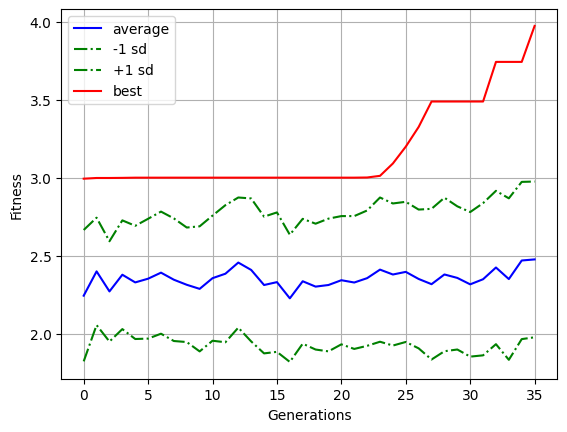

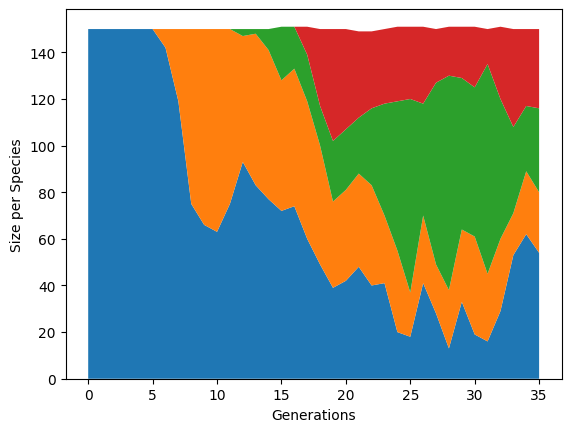

problema3 {'num_runs': 10}
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


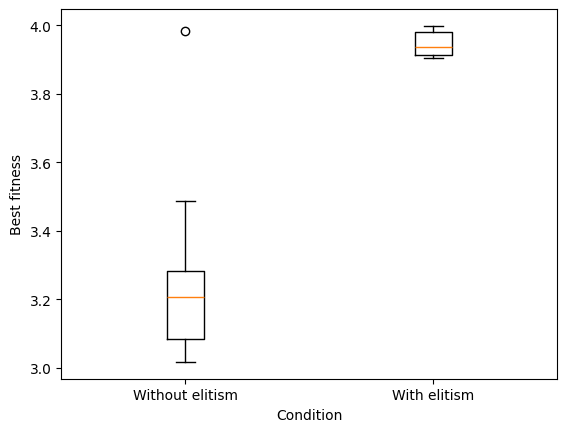

In [10]:
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 2-input XOR inputs and expected outputs.
inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

num_generations = 100


config_files = ['config-feedforward-2input-xor-noelitism.txt',
                'config-feedforward-2input-xor-elitism.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

runs = {'problema1': {'config_file': config_files[0], 'num_runs': 1},
        'problema2': {'config_file': config_files[1], 'num_runs': 1},
        'problema3': {'num_runs': 10},
        }
local_dir = os.path.dirname('utils/utils_08/')
for run in runs:
    print(run, runs[run])
    num_runs = runs[run]['num_runs']
    if num_runs == 1:
        # Load configuration.
        config_file = os.path.join(local_dir, runs[run]['config_file'])
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                            neat.DefaultSpeciesSet, neat.DefaultStagnation,
                            config_file)

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # Add a stdout reporter to show progress in the terminal.
        stats = neat.StatisticsReporter()
        p.add_reporter(neat.StdOutReporter(True))
        p.add_reporter(stats)

        # run NEAT for num_generations
        winner = p.run(eval_genomes, num_generations)

        # Display the winning genome.
        print('\nBest genome:\n{!s}'.format(winner))

        # Show output of the most fit genome against training data.
        print('\nOutput:')
        winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
        for xi, xo in zip(inputs, outputs):
            output = winner_net.activate(xi)
            print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

        node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
        
        
        visualize.plot_stats(stats, ylog=False, view=True)
        visualize.plot_species(stats, view=True)
        
        #if you want to visualize the network architecture uncomment the following line of code
        #having graphviz installed on your device is required in order to visualize the plot  
        #how to install it? see link https://graphviz.org/download/ 
        #visualize.draw_net(config, winner, filename='2-input OR', view=True, node_names=node_names)
    else:
        results = []
        for file in config_files:

            # Load configuration.
            config_file = os.path.join(local_dir, file)
            config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                                neat.DefaultSpeciesSet, neat.DefaultStagnation,
                                config_file)

            best_fitnesses = []
            for i in range(num_runs):
                print('{0}/{1}'.format(i+1,num_runs))
                p = neat.Population(config)
                winner = p.run(eval_genomes, num_generations)
                best_fitnesses.append(winner.fitness)
            results.append(best_fitnesses)

        fig = figure('NEAT')
        ax = fig.gca()
        ax.boxplot(results)
        ax.set_xticklabels(['Without elitism', 'With elitism'])
        #ax.set_yscale('log')
        ax.set_xlabel('Condition')
        ax.set_ylabel('Best fitness')
        show()

## Exercise 4
In this exercise we use again NEAT, this time to solve a 3-input Boolean function described by the truth table shown in the Table below. This function returns $1$ if and only if only one input is equal to $1$, otherwise it returns $0$.

| **Input 1** | **Input 2** | **Input 3** | **Output** |
|:-----------:|:-----------:|:-----------:|:----------:|
| 0           | 0           | 0           | 0          |
| 0           | 0           | 1           | 1          |
| 0           | 1           | 0           | 1          |
| 0           | 1           | 1           | 0          |
| 1           | 0           | 0           | 1          |
| 1           | 0           | 1           | 0          |
| 1           | 1           | 0           | 0          |
| 1           | 1           | 1           | 0          |


This script has the same structure that we have seen in the previous exercise. In this exercise two different configuration files will be used, namely:
- ``config-feedforward-3input-function-nohidden.txt``
- ``config-feedforward-3input-function-hidden.txt``

In this case the only difference between the two configurations (which both use elitism) is the number of hidden nodes to add to each genome in the initial population (parameter ``num_hidden``), which is set respectively to $0$ and $3$ (also, note that the parameter ``num_inputs`` is set to $3$ to allow the use of $3$ inputs, while in the previous exercise it was set to $2$). Note that as in this case the optimal fitness value is $8$ (i.e., the Neural Network output is correct in all 8 input cases), in both configuration files the parameter ``fitness_threshold`` is set to $7.9$.

- What do you observe in this case when you execute a single run of each configuration? What is the effect of using hidden nodes in the initial population?

Fitness Convergence: In both configurations, the fitness value steadily improves, but the configuration with hidden nodes tends to reach higher fitness levels faster. The inclusion of hidden nodes likely enables the model to capture more complex relationships within the data, aiding in the faster convergence toward the optimal solution.

Species Dynamics: For the configuration without hidden nodes, the diversity of species is more pronounced initially, and species distribution remains relatively dynamic throughout generations. With hidden nodes, there are fewer fluctuations in the number of species after an initial stabilization phase, indicating that the hidden nodes help narrow the search space, allowing the evolutionary process to converge more quickly on promising solutions.

Performance Impact of Hidden Nodes: The use of hidden nodes in the initial population helps the neural networks in the population perform more complex computations early on, improving the overall fitness more rapidly. This suggests that hidden nodes play a critical role in improving the network's ability to approximate the target Boolean function effectively, especially in tasks that require capturing non-linear patterns.

In summary, the configuration with hidden nodes shows a faster and more stable convergence in fitness and species dynamics, indicating that adding complexity to the initial population via hidden nodes can facilitate the evolution process for certain tasks.

- What happens when you configure the script to execute multiple runs? Does the boxplot confirm -in statistical terms- what you observed on a single run? (**NOTE**: it takes 1-2 minutes to execute 10 runs for both configurations.)

he boxplots from multiple runs of the NEAT algorithm with and without hidden nodes show a clear difference in performance.

Without Hidden Nodes: The boxplot shows that the best fitness achieved across multiple runs without hidden nodes remains relatively low, centered around a fitness value of approximately 7.0. This suggests that the algorithm struggles to reach higher fitness values without hidden nodes, as the range of performance is constrained and there are few outliers.

With Hidden Nodes: In contrast, the boxplot for runs with hidden nodes shows a higher median fitness, closer to the optimal fitness threshold (around 7.9 or 8.0). The variation in fitness is narrower, indicating more consistent convergence to higher fitness values. There are a few outliers, but overall, the distribution confirms that adding hidden nodes in the initial population helps the algorithm perform better and reach higher fitness values.

In summary, the boxplots confirm statistically that adding hidden nodes in the initial population leads to better convergence and a higher likelihood of reaching optimal fitness values across multiple runs.

problema1 {'config_file': 'config-feedforward-3input-function-nohidden.txt', 'num_runs': 1}

 ****** Running generation 0 ****** 

Population's average fitness: 4.38001 stdev: 1.01163
Best fitness: 5.95750 - size: (1, 3) - species 1 - id 131
Average adjusted fitness: 0.596
Mean genetic distance 1.148, standard deviation 0.370
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      6.0    0.596     0
Total extinctions: 0
Generation time: 0.011 sec

 ****** Running generation 1 ****** 

Population's average fitness: 5.00710 stdev: 0.79604
Best fitness: 6.23227 - size: (1, 2) - species 1 - id 281
Average adjusted fitness: 0.621
Mean genetic distance 1.192, standard deviation 0.398
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      6.2    0.621     0
Total extinctions: 0
Generation time: 0.016 sec (0.014 a

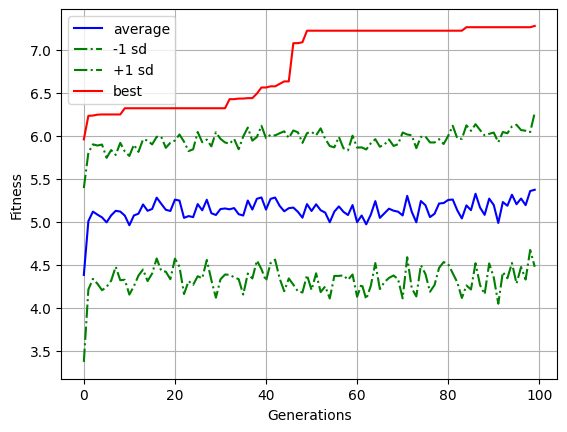

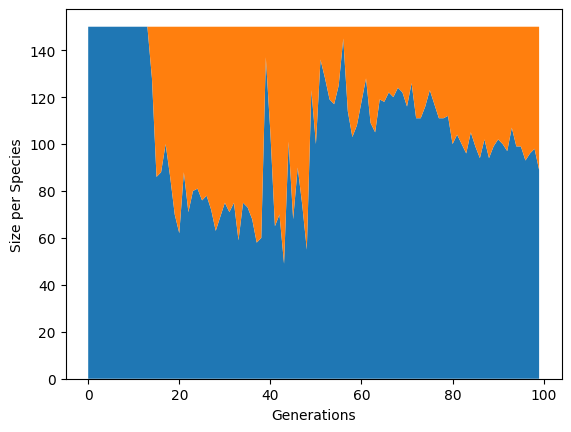

problema2 {'config_file': 'config-feedforward-3input-function-hidden.txt', 'num_runs': 1}

 ****** Running generation 0 ****** 

Population's average fitness: 4.55691 stdev: 0.98733
Best fitness: 6.30541 - size: (4, 12) - species 77 - id 77
Average adjusted fitness: 0.471
Mean genetic distance 3.496, standard deviation 0.350
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     2      5.0    0.606     0
     2    0     2      4.5    0.452     0
     3    0     2      5.5    0.771     0
     4    0     2      5.6    0.792     0
     5    0     2      3.3    0.078     0
     6    0     2      5.1    0.646     0
     7    0     2      5.0    0.608     0
     8    0     2      3.1    0.045     0
     9    0     2      3.0    0.013     0
    10    0     2      5.1    0.627     0
    11    0     2      3.0    0.000     0
    12    0     2      5.7    0.829     0
    13    0     2      5.0    0.605     0
 

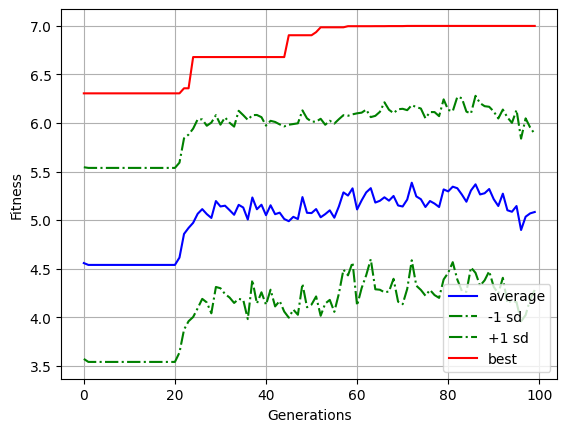

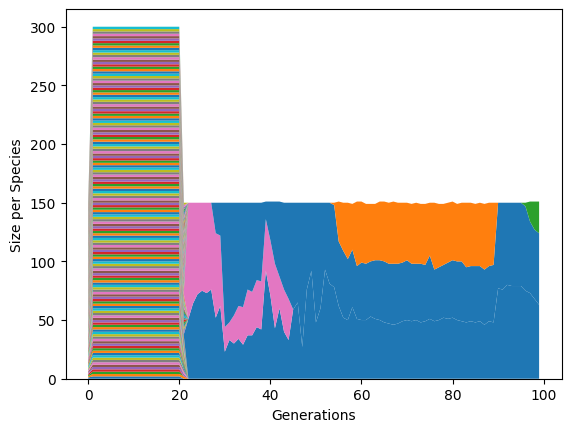

problema3 {'num_runs': 10}
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


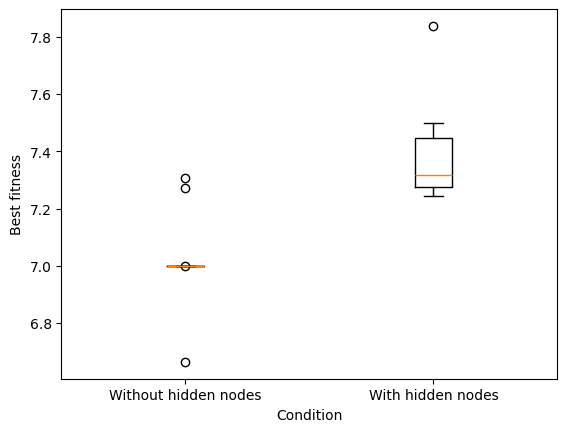

In [12]:
"""
3-input Boolean function
"""

from __future__ import print_function
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 3-input Boolean function inputs and expected outputs.
inputs = [(0.0, 0.0, 0.0),
          (0.0, 0.0, 1.0),
          (0.0, 1.0, 0.0),
          (0.0, 1.0, 1.0),
          (1.0, 0.0, 0.0),
          (1.0, 0.0, 1.0),
          (1.0, 1.0, 0.0),
          (1.0, 1.0, 1.0)]
outputs = [(0.0,),(1.0,),(1.0,),(0.0,),(1.0,),(0.0,),(0.0,),(0.0,)]

num_generations = 100


config_files = ['config-feedforward-3input-function-nohidden.txt',
                'config-feedforward-3input-function-hidden.txt']

runs = {'problema1': {'config_file': config_files[0], 'num_runs': 1},
        'problema2': {'config_file': config_files[1], 'num_runs': 1},
        'problema3': {'num_runs': 10}
        }

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


    
local_dir = os.path.dirname('utils/utils_08/')

for run in runs:
    print(run, runs[run])
    num_runs = runs[run]['num_runs']
    if num_runs == 1:

        # Load configuration.
        config_file = os.path.join(local_dir, runs[run]['config_file'])
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                            neat.DefaultSpeciesSet, neat.DefaultStagnation,
                            config_file)

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # Add a stdout reporter to show progress in the terminal.
        stats = neat.StatisticsReporter()
        p.add_reporter(neat.StdOutReporter(True))
        p.add_reporter(stats)

        # run NEAT for num_generations
        winner = p.run(eval_genomes, num_generations)

        # Display the winning genome.
        print('\nBest genome:\n{!s}'.format(winner))

        # Show output of the most fit genome against training data.
        print('\nOutput:')
        winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
        for xi, xo in zip(inputs, outputs):
            output = winner_net.activate(xi)
            print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

        node_names = {-1:'A', -2: 'B', -3: 'C', 0:'f(A,B,C)'}
        
        #if you want to visualize the network architecture uncomment the following line of code
        #having graphviz installed on your device is required in order to visualize the plot  
        #how to install it? see link https://graphviz.org/download/ 
        #visualize.draw_net(config, winner, filename='3-input Bool function', view=True, node_names=node_names)
        
        visualize.plot_stats(stats, ylog=False, view=True)
        visualize.plot_species(stats, view=True)

    else:

        results = []
        for file in config_files:

            # Load configuration.
            config_file = os.path.join(local_dir, file)
            config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                                neat.DefaultSpeciesSet, neat.DefaultStagnation,
                                config_file)

            best_fitnesses = []
            for i in range(num_runs):
                print('{0}/{1}'.format(i+1,num_runs))
                p = neat.Population(config)
                winner = p.run(eval_genomes, num_generations)
                best_fitnesses.append(winner.fitness)
            results.append(best_fitnesses)

        fig = figure('NEAT')
        ax = fig.gca()
        ax.boxplot(results)
        ax.set_xticklabels(['Without hidden nodes', 'With hidden nodes'])
        #ax.set_yscale('log')
        ax.set_xlabel('Condition')
        ax.set_ylabel('Best fitness')
        show()

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- What is the genotype and what is the phenotype in the problems considered in this lab?

Genotype: In this lab, the genotype refers to the encoded structure of the neural network, including nodes, connections, and weights.
Phenotype: The phenotype is the functional behavior of the neural network, i.e., the network’s output for given inputs.

- Why are hidden nodes sometimes needed for a Neural Network to solve a given task? What is the defining feature of problems that networks without hidden nodes are unable to solve?

Hidden nodes enable neural networks to learn complex patterns and non-linear relationships. Problems that require hidden nodes often involve patterns that cannot be represented as linear combinations of inputs. Without hidden nodes, the network is limited to solving linearly separable problems only.

- Why are recurrent connections needed to solve certain problems? What is the defining feature of problems that networks without recurrent connections are unable to solve? Are there problems that require recurrent connections and multiple hidden nodes?

Recurrent connections are essential for problems that require memory or time-based dependencies, such as sequence prediction or tasks where previous inputs influence current outputs. Without recurrent connections, networks cannot capture temporal dependencies, making them unsuitable for tasks involving sequences or time-series data.
Some problems may require both recurrent connections and multiple hidden nodes, especially if they involve complex patterns over time that also need hierarchical processing within each time step. Examples include natural language processing tasks and time-series forecasting with intricate dependencies.